# Clustering research
```In this exercise you are asked to examine 3 different clustering algorithms: KMeans, DBscan and GMM.
You will have to generate manipulative datasets, and demonstrate the weaknesses of each method. That is, for each one of the clustering methods, generate a dataset such that one of the methods will fail, and the others will not. Deal with the method's hyper parameters and conclude how sensitive are the methods. Which method is easiest to use? Which method is the fastest to use?
For each dataset draw your results using your favorite visualization tool.```

~```Ittai Haran```

example:

c:\users\itay\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


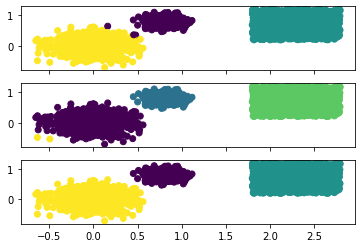

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

colors = dict(zip(list(range(3))+[-1], [0.1, 0.4 ,0.7, 0.9]))
#colors = dict(zip(list(range(14))+[-1], np.arange(15)/15 + 1.0/15))

np.random.seed(999)

data = np.concatenate([np.random.normal(0, 0.2, (1000, 2)),\
                       np.random.normal(0.8, 0.1, (1000, 2)),\
                       np.random.random((1000,2)) + np.array([1.8,0.2])])

clf_kmeans = KMeans(3, n_jobs=-1, max_iter=100)
y_kmeans = clf_kmeans.fit_predict(data)

clf_dbscan = DBSCAN(eps = 0.2, min_samples = 10, n_jobs = -1)
y_dbscan = clf_dbscan.fit_predict(data)

clf_gaussian = GaussianMixture(n_components=3)
clf_gaussian.fit(data)
y_gaussian = clf_gaussian.predict(data)

f, axarr = plt.subplots(3, sharex=True)
axarr[0].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_kmeans)))
axarr[1].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_dbscan)))
axarr[2].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_gaussian)))
plt.show()

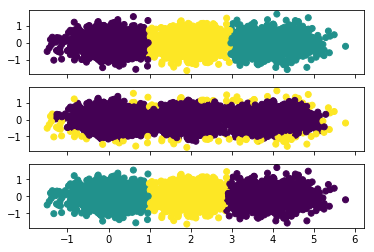

dbscan finds 2 clusters  one of which is -1


In [118]:
def fuck_with_dbscan():
    colors = dict(zip(list(range(3))+[-1], [0.1, 0.4 ,0.7, 0.9]))
    
    np.random.seed(999)
    
    data = np.concatenate([np.random.normal([0,0], 0.5, (1000, 2)),\
                            np.random.normal([2,0], 0.5, (1000, 2)),\
                            np.random.normal([4,0], 0.5, (1000, 2))])

    clf_kmeans = KMeans(3, n_jobs=-1, max_iter=100)
    y_kmeans = clf_kmeans.fit_predict(data)

    clf_dbscan_many = DBSCAN(eps = 0.2, min_samples = 10, n_jobs = -1)
    y_dbscan_many = clf_dbscan.fit_predict(data)
    clf_dbscan_few = DBSCAN(eps = 0.2, min_samples = 10, n_jobs = -1)
    y_dbscan_few = clf_dbscan_few.fit_predict(data)

    clf_gaussian = GaussianMixture(n_components=3)
    clf_gaussian.fit(data)
    y_gaussian = clf_gaussian.predict(data)

    f, axarr = plt.subplots(3, sharex=True)
    axarr[0].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_kmeans)))
    axarr[1].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_dbscan)))
    axarr[2].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_gaussian)))
    plt.show()
    
    print("dbscan finds %d clusters"%(len(np.unique(y_dbscan))), " one of which is %d"%(np.min(y_dbscan)))

fuck_with_dbscan()

Kmeans, despite being parametrized correctly, mis-clusters some of the points from the high-variance cluster into the low-variance one


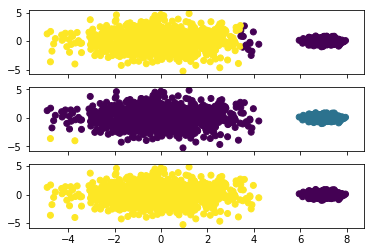

In [122]:
def fuck_with_kmeans():
    colors = dict(zip(list(range(3))+[-1], [0.1, 0.4 ,0.7, 0.9]))
    
    np.random.seed(999)
    
    data = np.concatenate([np.random.normal([0,0], 1.5, (1000, 2)),\
                            np.random.normal([7,0], 0.3, (1000, 2))])

    clf_kmeans = KMeans(2, n_jobs=-1, max_iter=100)
    y_kmeans = clf_kmeans.fit_predict(data)

    clf_dbscan = DBSCAN(eps = 1.5, min_samples = 5, n_jobs = -1)
    y_dbscan = clf_dbscan.fit_predict(data)

    clf_gaussian = GaussianMixture(n_components=2)
    clf_gaussian.fit(data)
    y_gaussian = clf_gaussian.predict(data)
    
    print("Kmeans, despite being parametrized correctly, mis-clusters some of the points from the high-variance cluster into the low-variance one")
    
    f, axarr = plt.subplots(3, sharex=True)
    axarr[0].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_kmeans)))
    axarr[1].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_dbscan)))
    axarr[2].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_gaussian)))
    plt.show()

fuck_with_kmeans()

Kmeans fails to make the distinction between the two equal-mean clusters based on variance


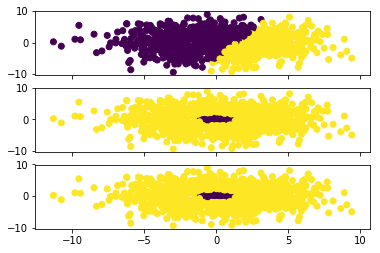

In [111]:
def fuck_with_kmeans2():
    colors = dict(zip(list(range(3))+[-1], [0.1, 0.4 ,0.7, 0.9]))
    
    np.random.seed(999)
    
    cluster1 = np.random.normal([0,0], 0.5, (1000, 2))
    cluster2 = np.random.normal([0,0], 3, (2000, 2))
    cluster2 = np.asarray(list(filter(lambda x: np.linalg.norm(x)>2, cluster2)))[:1000]
    
    
    data = np.concatenate([cluster1, cluster2])

    clf_kmeans = KMeans(2, n_jobs=-1, max_iter=100)
    y_kmeans = clf_kmeans.fit_predict(data)

    clf_dbscan = DBSCAN(eps = 0.2, min_samples = 10, n_jobs = -1)
    y_dbscan = clf_dbscan.fit_predict(data)

    clf_gaussian = GaussianMixture(n_components=2)
    clf_gaussian.fit(data)
    y_gaussian = clf_gaussian.predict(data)
    
    print("Kmeans fails to make the distinction between the two equal-mean clusters based on variance")
    
    f, axarr = plt.subplots(3, sharex=True)
    axarr[0].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_kmeans)))
    axarr[1].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_dbscan)))
    axarr[2].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_gaussian)))
    plt.show()

fuck_with_kmeans2()

In [100]:
cluster2 = np.random.normal([0,0], 3, (5000, 2))
#cluster2 = list(filter(lambda x: np.abs(x)>1, list(cluster2)))
#print(cluster2)

l = np.arange(-5,5)
print(np.l2(cluster2[0]))
#print(list(filter(lambda x: x%2==0, l)))

AttributeError: module 'numpy' has no attribute 'l2'